In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
fuel_econ = pd.read_csv('./fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,Cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


Rug and Strip Plots
You might encounter, or be interested in, marginal distributions that are plotted alongside bivariate plots such as scatterplots. A marginal distribution is simply the univariate distribution of a variable, ignoring the values of any other variable. For quantitative data, histograms or density curves are fine choices for marginal plot, but you might also see the **rug plot** employed. In a rug plot, all of the data points are plotted on a single axis, one tick mark or line for each one. Compared to a marginal histogram, the rug plot suffers somewhat in terms of readability of the distribution, but it is more compact in its representation of the data.

Seaborn's JointGrid class enables this plotting of bivariate relationship with marginal univariate plots for numeric data. The plot_joint method specifies a plotting function for the main, joint plot for the two variables, while the plot_marginals method specifies the plotting function for the two marginal plots. Here, we make use of seaborn's rugplot function.

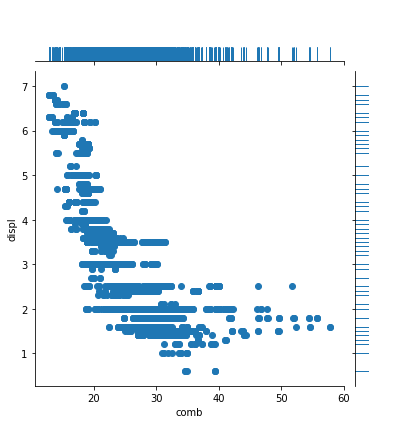

In [6]:
g = sb.JointGrid(data = fuel_econ, x = 'comb', y = 'displ')
g.plot_joint(plt.scatter)
g.plot_marginals(sb.rugplot, height = 0.25)

The "height" parameter specifies the rug ticks to be 0.25 the height of the marginal axis size.
The rug plot is fine here since the data isn't particularly numerous or overly dense. In other circumstances, a histogram or density curve will be more appropriate. You probably won't consider the rug plot as a primary plot choice, but it can be a good supporter plot in certain circumstances.

Another supporting plot type similar to the rug plot is the strip plot. It's like a swarm plot (see the previous page) but without any dodging or jittering to keep points separate or off the categorical line. You can also think of it as a rug plot faceted by categorical levels. You can use seaborn's swarmplot function to add a swarm plot to any other plot. The inner = "stick" and inner = "point" options can also be used with the violinplot function to include a swarm plot inside of the violin areas, instead of a box plot.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text yticklabel objects>)

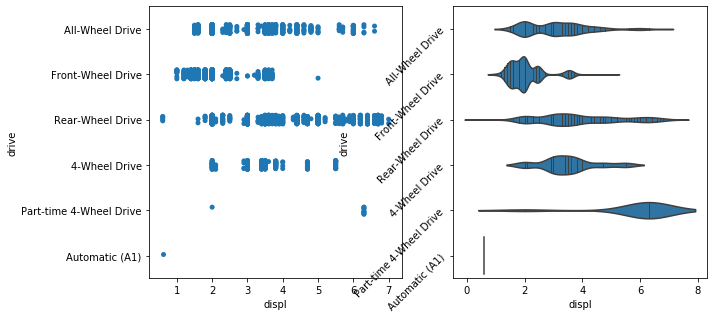

In [13]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: strip plot
plt.subplot(1, 2, 1)
ax1 = sb.stripplot(data = fuel_econ, x = 'displ', y = 'drive',
                   color = base_color)

# right plot: violin plot with inner strip plot as lines
plt.subplot(1, 2, 2)
sb.violinplot(data = fuel_econ, x = 'displ', y = 'drive', color = base_color,
             inner = 'stick')
plt.yticks(rotation = 45)